<a href="https://colab.research.google.com/github/gbickenbach/BiologicalAgeModel/blob/main/Official_Biological_Age_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.model_selection import LeaveOneOut
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y = pd.read_csv("drive/MyDrive/Lab/Final Attempt/Data/OfficialBiologicalAge.csv")
x = pd.read_csv("drive/MyDrive/Lab/Final Attempt/Data/OfficialLargeMethylation.csv")

In [ ]:
x = x.drop(columns= "sampleID")

In [ ]:
y

In [ ]:
x

In [ ]:
cv = LeaveOneOut()

In [ ]:
y_true = []
y_pred = []

In [ ]:

for train_ix, test_ix in cv.split(x):
  X_train, X_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
  y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
  lasso = LassoCV(cv=10, max_iter=4000)
  lasso.fit(X_train, y_train.values.ravel())
  yhat = lasso.predict(X_test)
  y_true.append(y_test.iloc[0,0])
  y_pred.append(yhat[0])


Text(0, 0.5, 'Predicted Biological Age')

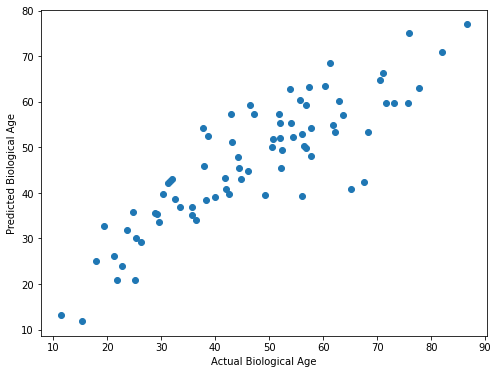

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_true,y_pred)
plt.xlabel("Actual Biological Age")
plt.ylabel("Predicted Biological Age")

In [ ]:
cc = np.corrcoef(y_true,y_pred)
cc[0,1]


0.867179959375238

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_true = pd.DataFrame(y_true)

In [ ]:
y_pred.to_csv("drive/MyDrive/Lab/Final Attempt/Results/Biological Age/Predicted.csv")
y_true.to_csv("drive/MyDrive/Lab/Final Attempt/Results/Biological A/Actual.csv")